In [1]:
import numpy as np
import P_Cyg as pc
import matplotlib.pyplot as plt
from glob import glob
from astropy.io import fits as fts
from astropy.visualization import hist
import pandas as pd
from matplotlib import rcParams
import matplotlib.patheffects as pe

In [2]:
from matplotlib import rcParams
#rcParams['text.usetex'] = True
rcParams['figure.figsize'] = [10,10]
rcParams['lines.color'] = 'black'
rcParams['font.size'] = 20
rcParams['font.family'] = 'serif'
rcParams['legend.fontsize'] = 12

In [9]:
#Getting lists of data files
datadir = 'C:/Users/Keyan/Desktop/Science/Data/P-Cygni/Data/'
paperdir = "C:/Users/Keyan/Desktop/Science/Data/P-Cygni/Figures/Paper_Figures"
bt = pd.read_csv("C:/Users/Keyan/Desktop/Science/Data/P-Cygni/Data/bigtable.txt")
fits = glob(datadir + 'hpolccd*r_hw.fits')
txt = glob(datadir + 'hpolccd*r_hw.fits.txt')
blue_txt = glob(datadir + 'hpolccd*b_hw.fits.txt')
blue_fits = glob(datadir + 'hpolccd*b_hw.fits')
vfile = datadir+"/synthetic_filters/v_pcyg.txt"
v = pd.read_csv(vfile)
ret_txt = glob(datadir+'*ret*.txt')
ret_fits = glob(datadir+'*ret*.fits')
htxt = ret_txt + txt
cmap = plt.cm.viridis

In [4]:
ws,fs,qs,us,es = pc.get_all_QU(txt,1000,radial_velocity=-8.9)

In [5]:
bws,bfs,bqs,bus,bes = pc.get_all_QU(blue_txt,1000,radial_velocity=-8.9)

In [6]:
retws,retfs,retqs,retus,retes = pc.get_all_QU(ret_txt,1000,radial_velocity=-8.9)

In [7]:
bq,bu = np.mean(bqs,axis=0),np.mean(bus,axis=0)
bpol,bpos = pc.polarization(bq,bu)
rq,ru = np.mean(qs,axis=0),np.mean(us,axis=0)
rpol,rpos = pc.polarization(rq,ru)
retq,retu = np.mean(retqs,axis=0),np.mean(retus,axis=0)
retpol,retpos = pc.polarization(retq,retu)
# plt.figure(figsize=(15,7))
# plt.plot(bws[0],bpol)
# plt.plot(ws[0],rpol)
# plt.plot(retws[0],retpol)

In [8]:
bmask = np.where((bws[0]>4000) & (bws[0]<5900))
rmask = np.where((ws[0]>6200) & (ws[0]<9000))
test_polarizaton = np.array(list(bpol[bmask]) + list(rpol[rmask]))
test_wavelength = np.array(list(np.asarray(bws[0])[bmask]) + list(np.asarray(ws[0])[rmask]))
test_position = np.array(list(bpos[bmask]) + list(rpos[rmask]))

In [16]:
hq,hu,he = bt.ohq,bt.ohu,bt.he

In [17]:
ave_q = np.sum([q*(1/e**2)    for q,e in zip(hq,he)])/np.sum(1/np.array(he)**2)
ave_u = np.sum([u*(1/e**2)    for u,e in zip(hu,he)])/np.sum(1/np.array(he)**2)
ave_pol,ave_pos = pc.polarization(ave_q,ave_u)
ave_pol,ave_pos

(1.066367070160262, 34.779309182445566)

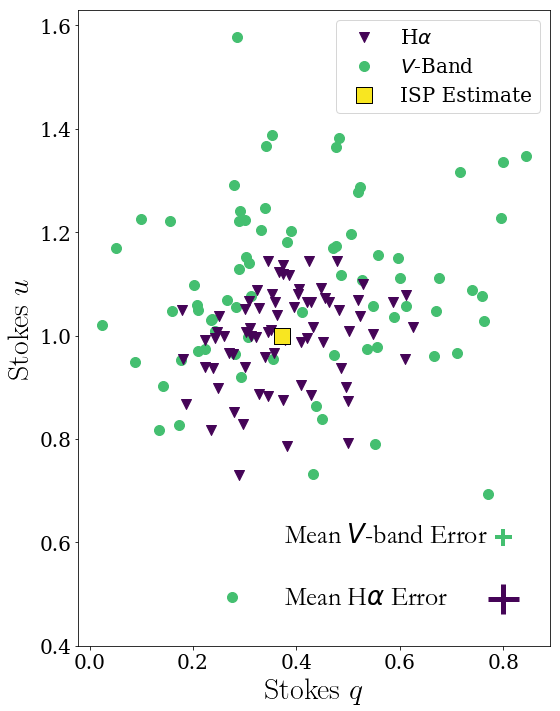

In [18]:
fig,ax = plt.subplots(1,figsize=(8.5,10));
plt.tight_layout(rect=(0,0.01,1,1))
ax.scatter(hq,hu,marker='v',color=cmap(0.01),zorder=10,label=r"H$\alpha$",s=100);
ax.scatter(v.q,v.u,color=cmap(0.7),zorder=1,label="$V$-Band",s=100)
ax.scatter(ave_q,ave_u,marker='s', color=cmap(0.99), s=250,zorder=100,edgecolors='black',label='ISP Estimate');
ax.errorbar(0.8,0.61,color=cmap(0.7),xerr=0.01658503611397811,yerr=0.01658503611397811,elinewidth=4)
ax.text(0.375,0.6,r"Mean $V$-band Error",fontsize=26,fontname='Garamond')
ax.errorbar(0.8,0.49,color=cmap(0.01),xerr=np.mean(he),yerr=np.mean(he),elinewidth=5)
ax.text(0.375,0.48,r"Mean H$\alpha$ Error",fontsize=26,fontname='Garamond')
ax.set_aspect("equal")
ax.set_ylim(0.4,1.63)
ax.set_ylabel("Stokes $u$",fontsize=30,usetex=True)
ax.set_xlabel("Stokes $q$",fontsize=30,usetex=True)
ax.legend(fontsize=20,loc='best')
plt.savefig(paperdir+"/compare.png",dpi=300,transparent=True,overwrite=True)
#draw lines between halpha and v for the same day
#color map: Bone -- v  Spooky

In [19]:
w_files= glob("C:/Users/Keyan/Desktop/Science/Data/P-Cygni/wuppe/*.fits")
all_w = []
all_q = []
all_u = []
all_e = []

for f in w_files:
    hdu = fts.open(f)
    tablehdu = hdu[1].header
    t = hdu[1].data
    w = t["WAVELENGTH"][0]
    all_w.append(w)
    q = t["Q"][0]
    all_q.append(q)
    u = t["U"][0]
    all_u.append(u)
    e = t["ERROR"][0]
    all_e.append(e)

In [20]:
ww = [np.mean(w[np.where((w >= 1700) & (w <= 1900))])    for w in all_w]
wq = [np.mean(q[np.where((w >= 1700) & (w <= 1900))])    for q,w in zip(all_q,all_w)]
wu = [np.mean(u[np.where((w >= 1700) & (w <= 1900))])    for u,w in zip(all_u,all_w)]
we = [np.mean(np.array(e)[(w >= 1700) & (w <= 1900)])    for e,w in zip(all_e,all_w)]

wpol,wpos = pc.polarization(all_q,all_u)
wpol,wpos = np.mean(wpol,axis=0),np.mean(wpos,axis=0)

In [21]:
ave_wq = np.sum([q*(1/e**2)    for q,e in zip(wq,we)])/np.sum(1/np.array(we)**2)
ave_wu = np.sum([u*(1/e**2)    for u,e in zip(wu,we)])/np.sum(1/np.array(we)**2)

In [22]:
w_1800_pol, w_1800_pos = pc.polarization(ave_wq,ave_wu)
w_1800_pol

0.4375306608799096

In [23]:
def WRL(w,l_max,p_max):
    K =  (1.86 * l_max/10000 - 0.1)
    exponential =  -1.15 * (np.log(l_max/np.asarray(w))**2)
    return p_max * np.exp(exponential)

In [24]:
def NordISP(w):
    return WRL(w,5100,1.17)

In [19]:
best_wavelength = 0
best_error = 100000000
best_pmax = 0
for l in np.linspace(4000,6000,2001):   
    exponential_term = np.exp(1.15*(np.log(l/6563)**2))
    test_pmax = ave_pol*exponential_term
    test_ISP = np.array(WRL(test_wavelength,l,test_pmax))
    error = sum((test_polarizaton-test_ISP)**2)
    if error < best_error:
        best_wavelength = l
        best_error = error
        best_pmax = test_pmax
rv = best_wavelength*0.00056
print("Pmax " +str(best_pmax))
print("Wavelength " + str(best_wavelength))
print("Rv " +str(rv)+" plus or minus "+str((best_wavelength*(0.00056+0.00003)-best_wavelength*(0.00056-0.00003))/2))

Pmax 1.2401854192500583
Wavelength 4653.0
Rv 2.6056799999999996 plus or minus 0.13958999999999988


In [20]:
def GootkinISP(w):
    return(WRL(w,best_wavelength,best_pmax))
def TaylorISP(w):
    w = np.array(w)
    ISP = 1.06*np.exp(-1.15*(np.log(5500/w)**2))
    return(ISP)

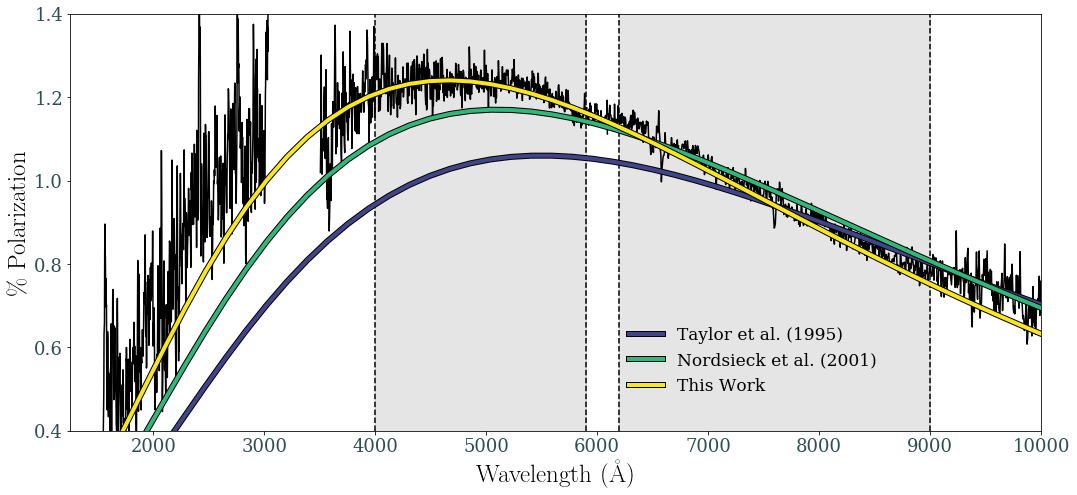

In [49]:
x = np.linspace(1000,10000)
fig,ax = plt.subplots(1,figsize=(15,7))
plt.tight_layout(rect=(0.01,0.02,1,1))
ax.axvspan(4000,5900,color='black',alpha=0.1)
ax.axvspan(6200,9000,color='black',alpha=0.1)
ax.axvline(4000,linestyle='--')
ax.axvline(5900,linestyle='--')
ax.axvline(6200,linestyle='--')
ax.axvline(9000,linestyle='--')

plt.plot(bws[0][150:-130],bpol[150:-130],color = "black")
plt.plot(ws[0][10:-100],rpol[10:-100],color = "black")
plt.plot(all_w[0][100:-180],wpol[100:-180],color = "black")

plt.plot(x,TaylorISP(x),label="Taylor et al. (1995)",linewidth=4,color = cmap(00.2),path_effects=[pe.Stroke(linewidth=6, foreground='black'), pe.Normal()])
plt.plot(x,NordISP(x),label="Nordsieck et al. (2001)",linewidth=4,color = cmap(0.66),path_effects=[pe.Stroke(linewidth=6, foreground='black'), pe.Normal()])
plt.plot(x,GootkinISP(x),label="This Work",linewidth=4,color = cmap(0.99),path_effects=[pe.Stroke(linewidth=6, foreground='black'), pe.Normal()])
plt.ylim(0.4,1.4);
plt.xlim(1250,10000);
plt.legend(fontsize=17,frameon=False,loc='lower left',bbox_to_anchor=(0.56,0.05));

plt.xticks(fontsize=18, color='darkslategrey')
plt.yticks(fontsize=18, color='darkslategrey')

plt.xlabel("Wavelength (\AA)",size=25,usetex=True);
plt.ylabel("\% Polarization",size=25,usetex=True);
plt.savefig(paperdir+"/isp.png",transparent=True,overwrite=True)

In [22]:
isp_pos = v.pa.mean()
isp_pos,v.pa.std()/np.sqrt(v.pa.size)

(34.394594342105265, 0.7148729102475447)

In [23]:
def isp_qu(ISP_pol,ISP_pa=isp_pos):
    q = np.array(ISP_pol)*np.cos(np.deg2rad(2*ISP_pa))
    u = np.array(ISP_pol)*np.sin(np.deg2rad(2*ISP_pa))
    return(q,u)

def sub_isp(w,q,u):
    ispq,ispu = isp_qu(GootkinISP(w))
    return np.asarray(q)-np.asarray(ispq),np.asarray(u)-np.asarray(ispu)

In [24]:
#Writing intrinsic pols to datafiles for ease

# for w,f,q,u,e,file in zip(ws,fs,qs,us,es,fits):
#     time = pc.get_time(file)
#     new_q,new_u = sub_isp(w,q,u)
#     df = pd.DataFrame({"Wavelength":w,"Flux":f,"Q":new_q,"U":new_u,"Error":e})
#     df.to_csv(intrinsic_dir+"{0:.2f}".format(time)+"r.txt",index=False)

# for w,f,q,u,e,file in zip(bws,bfs,bqs,bus,bes,blue_fits):
#     time = pc.get_time(file)
#     new_q,new_u = sub_isp(w,q,u)
#     df = pd.DataFrame({"Wavelength":w,"Flux":f,"Q":new_q,"U":new_u,"Error":e})
#     df.to_csv(intrinsic_dir+"{0:.2f}".format(time)+"b.txt",index=False)
    
# for w,f,q,u,e,file in zip(retws,retfs,retqs,retus,retes,ret_fits):
#     time = pc.get_ave_pol(file)[0]
#     new_q,new_u = sub_isp(w,q,u)
#     df = pd.DataFrame({"Wavelength":w,"Flux":f,"Q":new_q,"U":new_u,"Error":e})
#     df.to_csv(intrinsic_dir+"{0:.2f}".format(time)+"o.txt",index=False)